In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image

import os

from tqdm import tqdm
from pepe.preprocess import checkImageType

In [11]:
def generateMovie(images, outputFile='output.mp4', fps=30, progressBar=False):
    """
    """
    h, w = checkImageType(images[0]).shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(outputFile, fourcc, fps, (w, h))
    
    for image in tqdm(images) if progressBar else images:
        video.write(cv2.cvtColor(checkImageType(image), cv2.COLOR_RGB2BGR))
    
    video.release()

In [14]:
dataFolder = '/home/jack/Workspaces/data/scans/2024-06-10_LG_A_TIF/'
imageExtension = 'tif'
images = np.sort([f'{dataFolder}{f}' for f in os.listdir(dataFolder) if f[-3:].lower() == imageExtension.lower()])

generateMovie(images, progressBar=True)

100%|█████████████████████████████| 1115/1115 [09:56<00:00,  1.87it/s]


In [ ]:
    images = []
    
    for i in tqdm(range(360)):
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(projection='3d')
        
        ax.scatter(*newPoints.T, s=.3, alpha=.08, c='tab:orange')
        ax.scatter(*postPoints.T, s=10, alpha=1, c='black')
        
        #ax.set_aspect('equal')
        ax.set_title(f"{data.split('/')[-1].split('.')[0]} Skeleton")
        
        ax.view_init(20, i)
        canvas = plt.get_current_fig_manager().canvas
        canvas.draw()
    
        images.append(Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb()))
    
        plt.close()
    

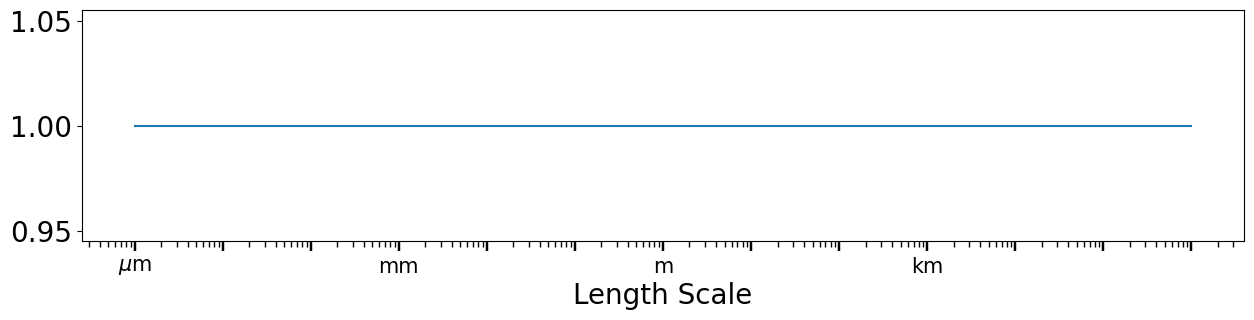

In [103]:
import matplotlib.ticker

plt.rcParams["font.size"] = 20

xArr = np.logspace(-6, 6, 100)
fig, ax = plt.subplots(1, 1, figsize=(15,3))

ax.semilogx(xArr, np.repeat(1, 100))
ax.set_xticks([1e-6, 1e-3, 1, 1e3, 1e6], ['$\mu$m', 'mm', 'm', 'km', ''], fontsize=15)
ax.set_xlabel('Length Scale')

nticks = 20
maj_loc = matplotlib.ticker.LogLocator(numticks=nticks)
min_loc = matplotlib.ticker.LogLocator(subs=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), numticks=nticks)
ax.xaxis.set_major_locator(maj_loc)
ax.xaxis.set_minor_locator(min_loc)

ax.get_xaxis().set_tick_params(which='major', size=7.5)
ax.get_xaxis().set_tick_params(which='major', width=1.75) 

ax.get_xaxis().set_tick_params(which='minor', size=4)
ax.get_xaxis().set_tick_params(which='minor', width=1) 

plt.savefig('log_x_axis_meters.svg')
plt.show()